# Learning Outcomes
1.Gentle introduction to what is computer vision
2.Review: Important concepts of image stored as Numpy array
3.Image cropping
4.Split and merge image channels
5.Point operators(+-*/) and gamma correction.
6.Image blending

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
from util_func import show_img

np.random.seed(99)

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

# Recap on images a Numpy Array
There are 2 primary types of images: grayscale (2D array, (h,w)) & color(3D array, (h,w,channels))

(2,4,3) 
-> (3) how many elements (column)
-> (4) how many elements (row)
-> (2) repeat itself how many times

In [4]:
#Create grayscale
img = np.zeros((2,4), dtype = np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]]


In [5]:
img_color=cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_color)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [12]:
img[0,1] = 50
img[1,2] = 150

print(img)

[[[120 133 231]
  [ 50  50  50]
  [119 132 230]
  ...
  [107 124 217]
  [128 143 236]
  [115 114 217]]

 [[119 132 230]
  [119 132 230]
  [150 150 150]
  ...
  [130 143 235]
  [151 159 252]
  [123 120 219]]

 [[119 132 230]
  [118 131 229]
  [118 131 229]
  ...
  [111 115 204]
  [113 111 201]
  [ 74  61 153]]

 ...

 [[ 74  34  92]
  [ 65  27  87]
  [ 59  22  84]
  ...
  [ 74  51 126]
  [ 79  58 137]
  [ 79  62 149]]

 [[ 74  34  92]
  [ 64  26  86]
  [ 57  20  82]
  ...
  [ 79  57 135]
  [ 86  69 150]
  [ 81  66 157]]

 [[ 56  18  76]
  [ 74  38  98]
  [ 61  25  91]
  ...
  [ 89  70 151]
  [ 92  75 162]
  [ 90  76 172]]]


# Access elements in an array

In [13]:
img = cv.imread("images/lena.jfif")

a = img[49, 219, 2]
b = img.item(49,219,2)
a == b

True

In [14]:
%timeit a = img[49, 219, 2]
%timeit b = img.item(49,219,2)

104 ns ± 5.29 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
90 ns ± 1.49 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


# Numpy slicing

In [15]:
h , w = img.shape[:2]
yc , xc = h//2, w//2

topleft = img[:yc, :xc]
show_img("topleft", topleft)

In [16]:
#60 x 60 central region of the image
centre =img[yc-30:yc+30, xc-30:xc+30]

show_img("center", centre)

# Create white image

In [17]:
img = np.zeros((200,200)) + 255
img = np.uint8(img)

show_img("img", img)

# Exercise

In [2]:
#Extract region of interest
img = cv.imread("images/flower.jfif")
img_copy = img.copy()
show_img("img",img)

# There are 3 ways to get the indices needed

In [6]:
#1 way
def rect_region(event,x,y,flags,params):
    if event == cv.EVENT_LBUTTONDOWN:
        print ((x,y))
        cv.circle(img, (x,y),1,(0,0,255),-1)
        cv.imshow("img",img)

        
cv.imshow("img",img)
cv.setMouseCallback("img",rect_region)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
# flower = img_copy[41:120,89:173]
# show_img('flower',flower)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [9]:
# 2 way:
bbox = cv.selectROI("crop", img_copy)

flower = img_copy[int(bbox[1]): int(bbox[1]+ bbox[3]),
                  int(bbox[0]): int(bbox[0]+ bbox[2])]

show_img('flower',flower)
cv.waitKey(0)
cv.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [3]:
img_arr = np.zeros((30,30), dtype=np.uint8)

img_arr[:10,10:20] = 255
img_arr[10:20,:10] = 255
img_arr[10:20,20:] = 255
img_arr[20:,10:20] = 255

img = np.tile(img_arr,(3,3))

show_img("pattern", img)

# Cropping an image
Why crop an image?

- Remove all unwanted objects or areas from an image
- Improve the overall composition of the image. Visit this link on how separating image into grids and putting the subject of interest on the intersection point could create a more compositional pleasing/aesthetically appealing photo. This is known as of rule of thirds.
- One of the image augmentation techniques in deep learning model training.

# Divide an image into smaller patches using cropping
One practical application of cropping in OpenCV is to divide an image into smaller patches. The following
example shows how to split image into a grid.

In [28]:
img = cv.imread('images/dog.jfif')
img_copy = img.copy()

h,w = img.shape[:2]
# user defined parameters
n_vertical_grids = 4
n_horizontal_grids = 4

M = int(h/n_vertical_grids)
N = int(h/n_horizontal_grids)

tiles = []

for y in range(0,h,M):
    for x in range(0,w,N):
        x1 = x + N
        y1 = y + M
        
        if x1 > w and y1 > h:
            x1 = w - 1
            y1 = h - 1
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile = img[y:h,x:w]
            tiles.append(tile)
            
        elif y1 > h:
            y1 = h - 1
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile = img[y:h,x:x1]
            tiles.append(tile)
            
        elif x1 > w:
            x1 = w -1
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile = img[y:h,x:w]
            tiles.append(tile)

        else:           
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile = img[y:h,x:x1]
            tiles.append(tile)
            
show_img("crop", img_copy)

In [30]:
show_img("patch", tiles[9])

In [10]:
img = cv.imread("images/lena.jfif")

(b,g,r) = cv.split(img)
img_merge = cv.merge((b,g,r))
np.array_equal(img, img_merge)

True

In [3]:
import matplotlib.pyplot as plt

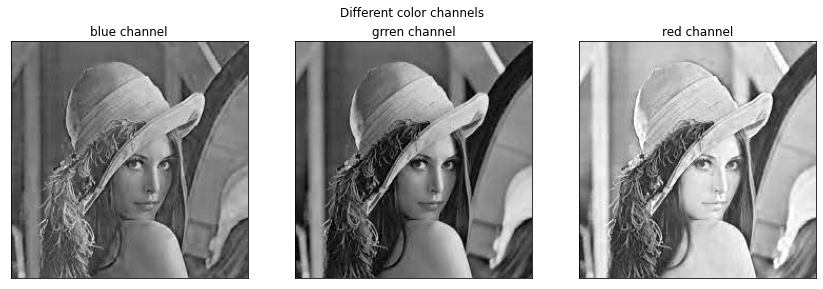

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (12,4), sharey=True)
fig.suptitle("Different color channels")

ax1.imshow(b,cmap= plt.cm.gray)
ax1.set(title = "blue channel", xticks = [],yticks = [])

ax2.imshow(g,cmap= plt.cm.gray)
ax2.set(title = "green channel", xticks = [],yticks = [])

ax3.imshow(r,cmap= plt.cm.gray)
ax3.set(title = "red channel", xticks = [],yticks = [])

plt.tight_layout()
plt.show()

# Exercise

In [10]:
#display different channels in color images
img = cv.imread("images/dog.jfif")
channels = cv.split(img)

#this color variable will be windows name
colors = ("blue","green","red")

imgs = []

for i,ch in enumerate(channels):
    img_arr = np.zeros_like(img)
    img_arr[...,i] = ch
    imgs.append(img_arr)
    
for c, img in zip(colors, imgs):
    cv.imshow(c,img)
    
cv.waitKey(0)
cv.destroyAllWindows()

# Point operators

In [11]:
np.uint8(np.array([-2,0,25,300]))

array([254,   0,  25,  44], dtype=uint8)

In [12]:
def point_op(img, alpha,beta):
    """point operators of image.
    Argument:
    img: input image
    alpha: coefficient
    beta: bias
    """
    img = img.astype(float)
    res = alpha * img + beta
    res = np.clip(res, 0, 255)
    return np.uint8(res)

In [13]:
img = cv.imread("images/bridge.jfif")

#increase the brightness and contrast
transform = point_op(img, 1.6, 20)

cv.imshow("original", img)
show_img("transform", transform)

In [14]:
darken = point_op(img, 1, -80)
show_img("transform", darken)

## Gamma correction
Technique to adjust brightness

$$O =(\frac{I}{255}^{\gamma} \times 255)

In [20]:
gamma = 1 / 2.2
lookUpTable = np.empty((1,256), dtype = np.uint8)

for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i/255.0,gamma)* 255.0,0,255)

img = cv.imread("images/mountains_prop.jpg")
res = cv.LUT(img, lookUpTable)

cv.namedWindow("ori", cv.WINDOW_NORMAL)
# cv.namedWindow("results", cv.WINDOW_NORMAL)
cv.imshow("ori", img)
show_img("gamma correction", res, adjust=True)

# Image blending ( add 2 images)

In [21]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

#resize img2 to be same dimension as img
h,w = img.shape[:2]
img2 = cv.resize(img2, (w,h))
alpha = 0.7
res = cv.addWeighted(img,alpha, img2, 1-alpha, 0)

cv.imshow("lena", img)
cv.imshow("resized coin", img2)
show_img("image blending", res)

# Weekly Activity

# Exercise 1

In [11]:
width = 696
height = 569

color_image = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
grayscale_image = cv.cvtColor(color_image, cv.COLOR_RGB2GRAY)
show_img("color_img", color_image)
show_img("grayscale_img", grayscale_image)

# Exercise 2

In [32]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    # img is the source image
    img_copy = img.copy()

    height,width = img.shape[:2]
    # user defined parameters

    M = int(height/num_vertical_grid)
    N = int(height/num_horizontal_grid)

    tiles = []

    for y in range(0,height,M):
        for x in range(0,width,N):
            x1 = x + N
            y1 = y + M
        
        if x1 > width and y1 > height:
            x1 = width - 1
            y1 = height - 1
            cv.rectangle(img_copy,(x,y),(x1,y1),(line_color),1)
            tile = img[y:height,x:width]
            tiles.append(tile)
            
        elif y1 > height:
            y1 = height - 1
            cv.rectangle(img_copy,(x,y),(x1,y1),(line_color),1)
            tile = img[y:height,x:x1]
            tiles.append(tile)
            
        elif x1 > width:
            x1 = width -1
            cv.rectangle(img_copy,(x,y),(x1,y1),(line_color),1)
            tile = img[y:height,x:width]
            tiles.append(tile)

        else:           
            cv.rectangle(img_copy,(x,y),(x1,y1),(line_color),1)
            tile = img[y:height,x:x1]
            tiles.append(tile)

    return img_copy


img = cv.imread('images/dog.jfif')
num_horizontal_grid = 4
num_vertical_grid = 4
line_color = (0,255,0)
img1 = crop_grid(img,num_horizontal_grid,num_vertical_grid,line_color)
cv.imshow('patched image', img1)
cv.waitKey(0)
cv.destroyAllWindows()

# Exercise 3

In [34]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

#resize img2 to be same dimension as img
h,w = img.shape[:2]
img2 = cv.resize(img2, (w,h))
alpha = 0.55
res = cv.addWeighted(img,alpha, img2, 1-alpha, 0)

show_img("image blending", res)

# Exercise 4

In [54]:
image = cv.imread('images/travel_hd.jpg')

# Set the watermark text and font properties
text = 'CV lab UCCC2513'
font = cv.FONT_HERSHEY_DUPLEX
font_scale = 5.0
font_thickness = 5
text_color = (255,255,255)

# Calculate the size of the watermark text
text_size, _ = cv.getTextSize(text, font, font_scale, font_thickness)

# Set the position for the watermark (left-bottom corner)
position = (10, image.shape[0] - 10 - text_size[1])

# Add the watermark text to the image
cv.putText(image, text, position, font, font_scale, text_color, font_thickness, cv.LINE_AA)

new_width = 400
new_height = 750
img_resize = cv.resize(image, (new_width, new_height), interpolation=cv.INTER_LINEAR)
show_img("Watermarked image", img_resize)
cv.waitKey(0)
cv.destroyAllWindows()